In [1]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
sys.path.append('C:\\Users\\henri\\source\\repos\\mozubi_tools\\')
import _Data.PredictionDataBase.DBFunctions as db
import _Analysis.Correlation.corr_functions as cfnc
from pandas.plotting import autocorrelation_plot

import seaborn as sns
sns.set(style="whitegrid",palette=sns.color_palette("Paired"))

In [2]:
df = db.GetALL().loc['2016':]
hkws = [col for col in df.columns if "HKW".lower() in col.lower()]

HKW = pd.DataFrame(df[hkws])
HKW['Hkw']= HKW.sum(axis=1)
HKW = pd.DataFrame(HKW.pop('Hkw'))
df = HKW.join(db.GetDAPrices()).join(db.GetIDPrices()).join(db.GetLoad()).join(db.GetWxSet('Temperature')).loc['2016':]
df = cfnc.AppendTimeIndexes(df)
df = df[['Hkw','DAPrice','Temperature','WeekDay','LoadVolume']]
df = df.interpolate(method='pchip')
df['LastDay'] = df['Hkw'].shift(96)
temperature =[]
HKW = []

In [6]:
df['LastDay'] = df['Hkw'].shift(96)
df = df.dropna()

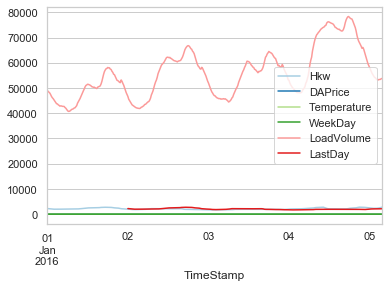

In [3]:
df.head(400).plot()

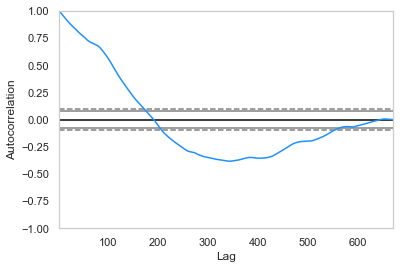

In [7]:
autocorrelation_plot(df.Hkw.head(96*7),color='dodgerblue')

In [3]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [4]:
df2 = df.head(96*5)

split = int(len(df2.Hkw)*0.7)
train,test = df2.Hkw.values[0:split], df2.Hkw.values[split:len(df2.Hkw)]
history = [x for x in train]

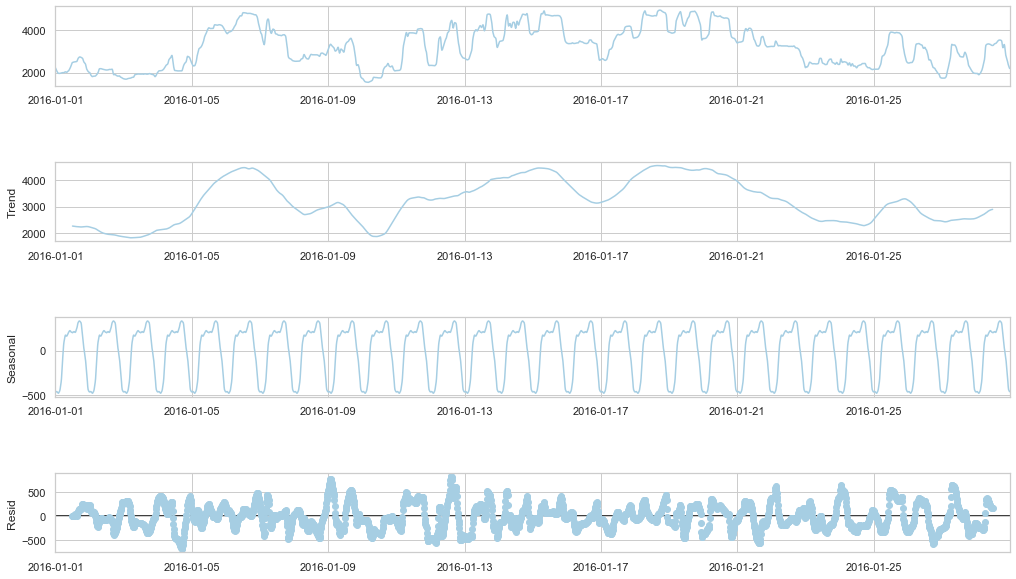

In [124]:
from statsmodels.tsa.seasonal import seasonal_decompose

df2 = pd.DataFrame(df['Hkw'].head(7*96*4))
df2 = df2.asfreq('15min').fillna(method='bfill').asfreq('15min')

result = seasonal_decompose(df2,freq=96, model='additive')
fig = result.plot()
fig.set_size_inches(16,9)

2222.0

In [57]:
forecast = fit.forecast()

In [10]:
test = df.Hkw.values

In [6]:
predictions = []
for t in range(0,len(test)):
    model = ARIMA(history,order=(48,1,0))
    model_fit=  model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhar)
    obs = test[t]
    history.append(obs)
    print('predicted: ' + yhat + ', expected: ' + obs)

print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()